In [4]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
from astropy.time import Time
from tqdm.auto import tqdm
import astropy.units as u
from muler.hpf import HPFSpectrum
import warnings

from pandas.core.common import SettingWithCopyWarning
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
goldilocks_files = sorted(glob.glob('C:/Users/jojoa/GitHub/disperse/data/HPF/Helium-transit-data/**/Goldilocks*.fits', recursive=True))

In [5]:
target_name = 'HAT-P-67b'
matchers = [target_name,'20200615'] #if file has date and name, pull it
matching = [s for s in goldilocks_files if all(xs in s for xs in matchers)]
goldilocks_files = matching

fn = goldilocks_files[0]
raw_spectrum = HPFSpectrum(file=fn,order=19)

(0.1, 1.7)

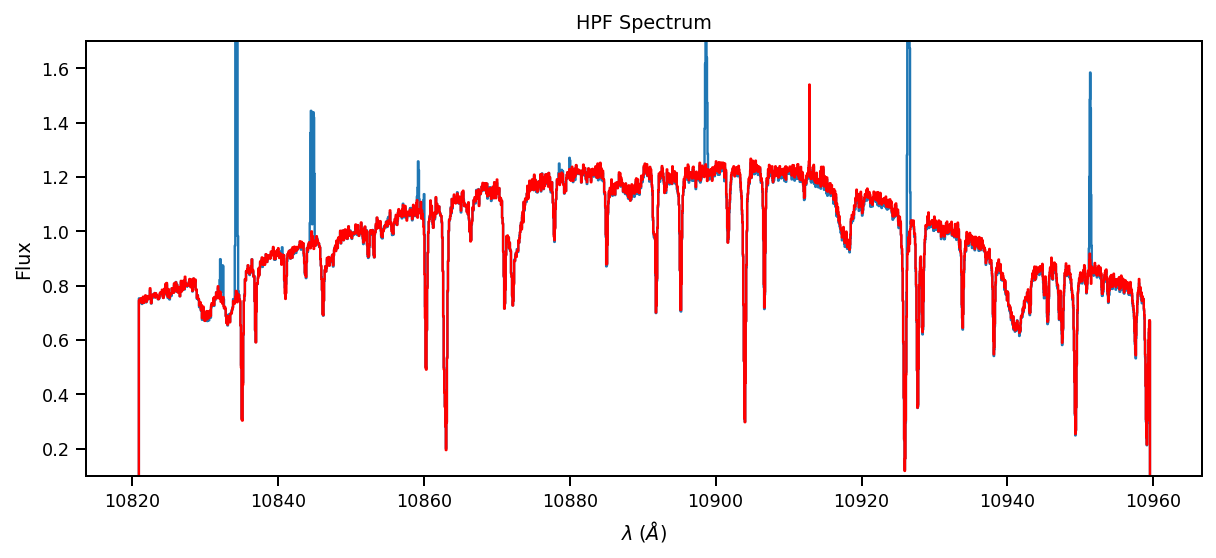

In [6]:
ax = raw_spectrum.normalize().plot() #spectrum with sky lines
raw_spectrum.sky_subtract(method='vector').normalize().plot(ax=ax,color='r') #sky subtracted spectrum
ax.set_ylim(0.1,1.7)